# K-Nearest Neighbors (KNN)

This note introduces the KNN algorithm using scikit-learn, explains the step-by-step logic behind how it works, and then demonstrates a from-scratch implementation to show that the core idea is simple and easy to build.

## What is KNN?

K-Nearest Neighbors (KNN) is like asking your neighbors for advice — it looks at the closest people around you.  
It doesn’t learn in advance or build a model. Instead, when it needs to make a decision, it checks the labels of the nearest known examples.  
The final prediction is simply the majority vote among those neighbors.

This notebook will:
- Use scikit-learn to demonstrate how KNN works in practice
- Explain the underlying logic with a simple, intuitive breakdown
- Show how to implement the same logic step by step from scratch
- Visualize both versions to confirm they behave the same

## Preparation

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load iris data (first 2 features for 2D visualization)
X, y = load_iris(return_X_y=True)
X = X[:, :2]  # Only sepal length and sepal width

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Reusable plot Function
def plot_knn_decision_boundary(knn, X_train, y_train, X_test=None, y_test=None, title="KNN Decision Boundary", figsize=(8, 6)):
    import numpy as np
    import matplotlib.pyplot as plt

    # Define mesh grid range
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    # Predict over the mesh
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train')

    if X_test is not None and y_test is not None:
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


## Classification with Scikit-Learn

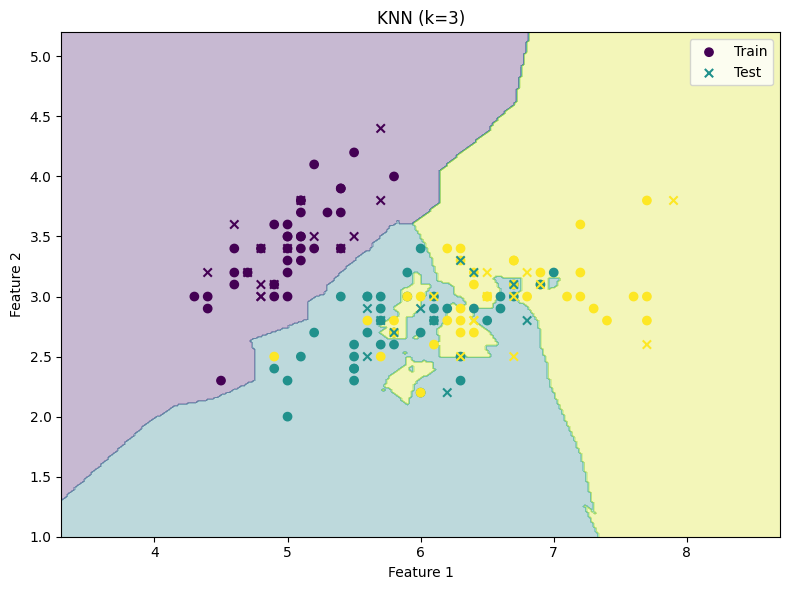

In [44]:
# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

plot_knn_decision_boundary(knn, X_train, y_train, X_test, y_test, title="KNN (k=3)")

## Understanding the Visualization

Each color area shows how the computer "thinks" different types of flowers are distributed.

When it sees a new flower (a point), it looks at the 3 closest flowers it already knows (its neighbors).

It then predicts the type by checking which group most of those 3 neighbors belong to.

Circles are training examples the computer has already seen.  
X marks are test examples used to check how well it makes predictions.

## Behind the Scenes

### 1. Store the Training Data
- Save the feature values and labels of all known examples.
- There is no training step — the model simply remembers the data.

### 2. When You See a New Point:
#### a. Measure Distance
- Use a distance formula (such as straight-line distance) to find how close the new point is to each known example.

#### b. Find the Closest Neighbors
- Sort all training points by distance and pick the `k` closest.  
- In this case, `k = 3`.

#### c. Vote for the Answer
- Check the labels of the `k` neighbors.
- The most common label among them becomes the prediction.

### 3. Done
- The model makes a decision without needing to learn ahead of time — it just compares and votes.

## Distance Formula (Euclidean)

To calculate how close two points are, we use **Euclidean distance**.

$$
\text{distance}(x, x') = \sqrt{(x_1 - x_1')^2 + \cdots + (x_n - x_n')^2}
$$

$$
\text{Where:} \\
x = \text{known point} \\
x' = \text{new point to classify} \\
x_1, x_2, \ldots, x_n = \text{feature values}
$$

> Don’t worry — this math is handled by NumPy in the code example below.

## Let’s Code It

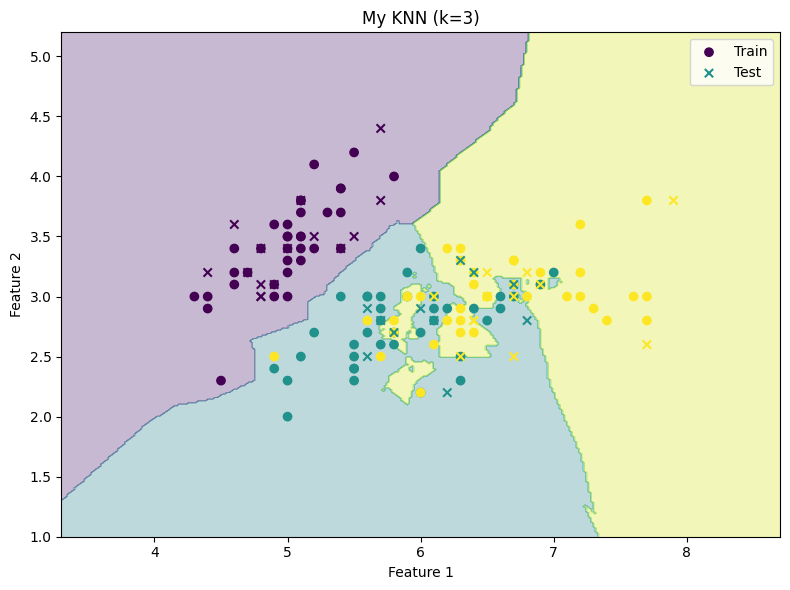

In [45]:
class MyKNeighborsClassifier:
    def __init__(self, k=3):
        self.k = k  # Number of neighbors to consider

    def fit(self, X, y):
        # Step 1: Store the training data
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        predictions = []

        # Step 2: For each new point in the test set
        for x_new in X_test:
            # a. Measure distance from x_new to all training points
            distances = [np.linalg.norm(x_new - x_train) for x_train in self.X_train]

            # b. Find the k nearest neighbors (smallest distances)
            k_indices = np.argsort(distances)[:self.k]
            k_labels = [self.y_train[i] for i in k_indices]

            # c. Vote: choose the most common label among neighbors
            values, counts = np.unique(k_labels, return_counts=True)
            most_common = values[np.argmax(counts)]
            predictions.append(most_common)

        # Step 3: Return predictions
        return np.array(predictions)

my_knn = MyKNeighborsClassifier(k=3)
my_knn.fit(X_train, y_train)

plot_knn_decision_boundary(my_knn, X_train, y_train, X_test, y_test, title="My KNN (k=3)")